In [1]:
import glob as _glob
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

folder = 'results'
pattern = 'AUC'

par_list = ['model_type', 'hidden_dims', 'lambda1', 'lambda2',  'epochs', 'learning_rate', 'weight_decay', 'early_stopping', 'n_splits', 'df_name', 'val_mean', 'val_std', 'test_mean', 'test_std']
def find_finished(folder, pattern):
    finished = []
    for filename in _glob.glob(os.path.join(folder, '*.results')):
        with open(filename, 'r') as file:
            results = json.load(file)
            if results['done']:
                mydict = { k: v  for k, v in results.items() if pattern in k } 
                val = np.array([v for k, v in mydict.items() if 'val' in k])
                test = np.array([v for k, v in mydict.items() if 'test' in k])
                results.update({'val_mean': np.mean(val), 
                                'val_std': np.std(val), 
                                'test_mean': np.mean(test), 
                                'test_std': np.std(val)})
                finished.append({k: v for k, v in results.items() if k in par_list})
    return finished
        
finished = find_finished(folder, 'AUC')
#print(finished)


Get best result

In [2]:
df = pd.DataFrame(finished)
df.head(20)
df.sort_values('val_mean', ascending=False).head(1)

,df_name,epochs,learning_rate,weight_decay,early_stopping,n_splits,model_type,hidden_dims,lambda1,lambda2,val_mean,val_std,test_mean,test_std
16,mindsteps_set_test_matrix,50,0.005,0,200,5,IRT,3,0.0,0.0,0.765196,0.083559,0.763825,0.083559


[Text(0.5, 0, 'dimensions'), Text(0, 0.5, 'AUC'), Text(0.5, 1.0, 'Test')]

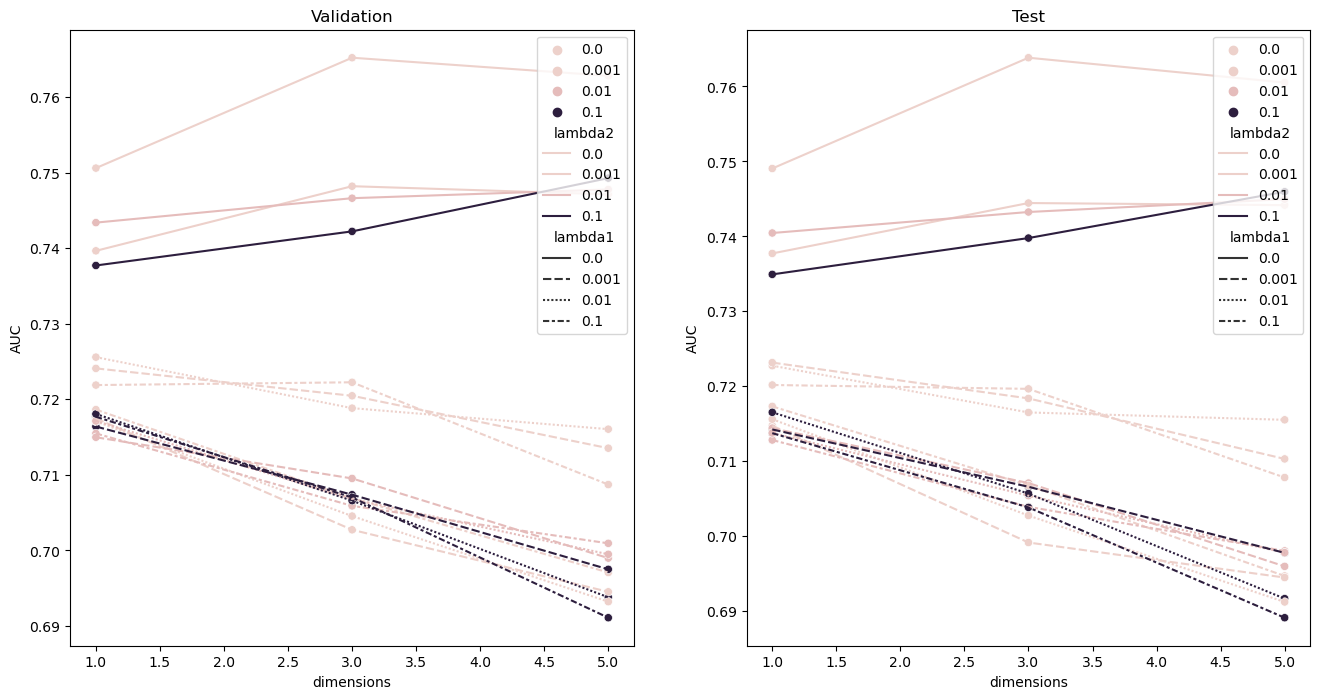

In [3]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(data=df, x='hidden_dims',  y='val_mean', hue='lambda2', ax=axes[0], color = 'k')
sns.scatterplot(data=df, x='hidden_dims',  y='test_mean',hue='lambda2', ax=axes[1], color = 'k')
sns.lineplot(data=df, x='hidden_dims',  y='val_mean', hue='lambda2', style='lambda1', ax=axes[0])
sns.lineplot(data=df, x='hidden_dims',  y='test_mean', hue='lambda2', style='lambda1', ax=axes[1])

axes[0].set(xlabel='dimensions', ylabel='AUC', title='Validation')
axes[1].set(xlabel='dimensions', ylabel='AUC', title='Test')